In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join, basename
import pickle
from scipy.stats import pearsonr
from scipy.signal import periodogram, filtfilt, spectrogram
import seaborn as sns
import xarray as xr
from glob import glob

from filtering import freq_filt

In [2]:
result_dir = '/bsuscratch/zacharykeskinen/data/infrasound/psd_results/windows'
wind_res = {}
for fp in glob(join(result_dir, '*')):
    with open(fp, 'rb') as f:
        avg_Pxx = pickle.load(f)
    wind_res[basename(fp)] = avg_Pxx

In [3]:
wind_res.keys()

dict_keys(['welch_0_45.pkl', 'welch_0_5.pkl', 'welch_0_30.pkl', 'welch_0_10.pkl', 'welch_3_15.pkl', 'welch_3_5.pkl', 'welch_3_10.pkl', 'welch_3_45.pkl', 'welch_3_30.pkl', 'welch_0_15.pkl'])

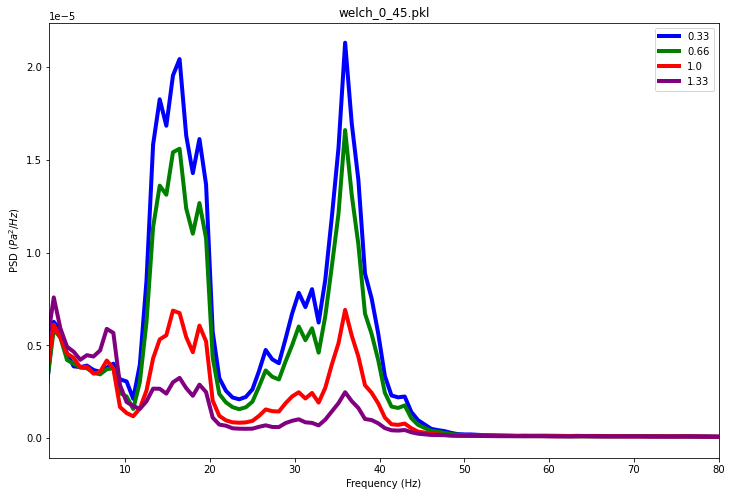

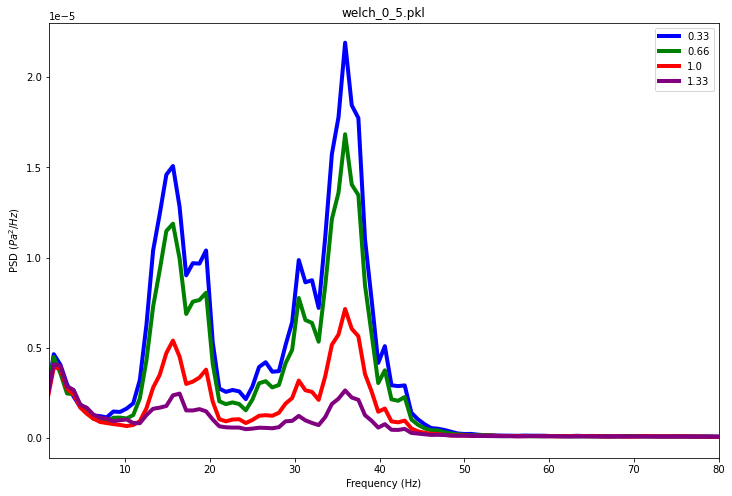

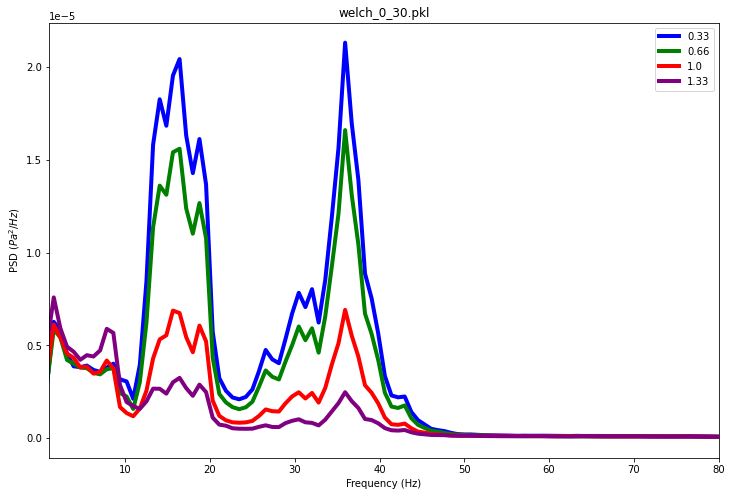

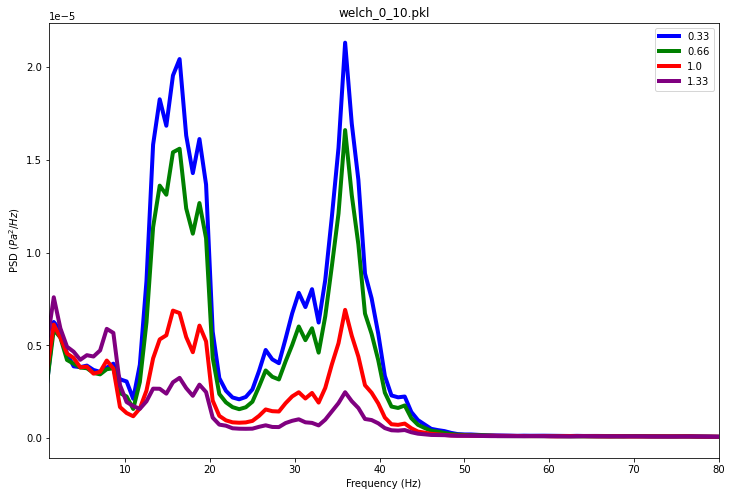

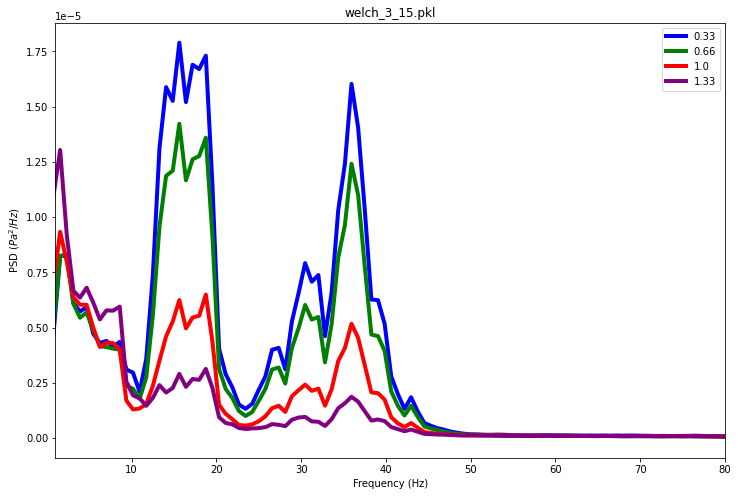

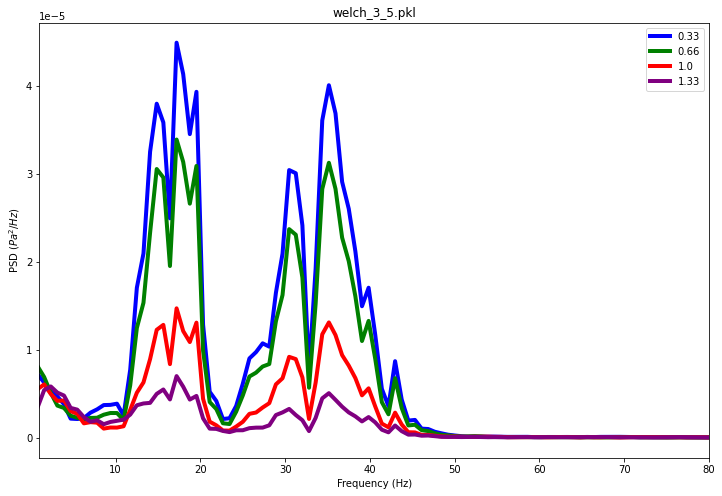

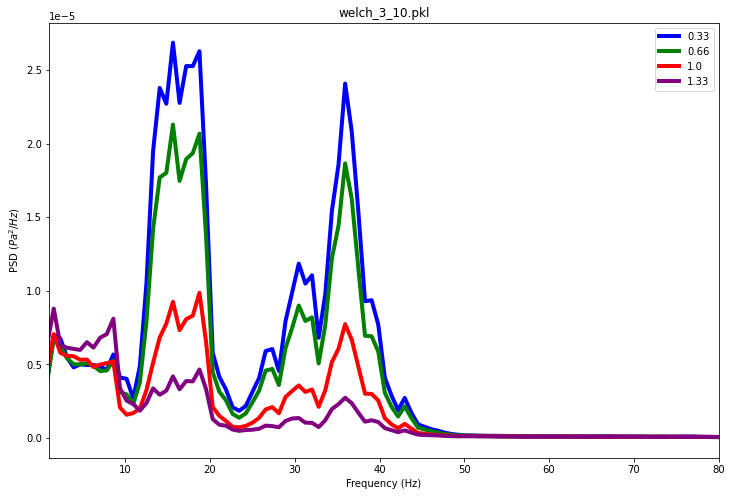

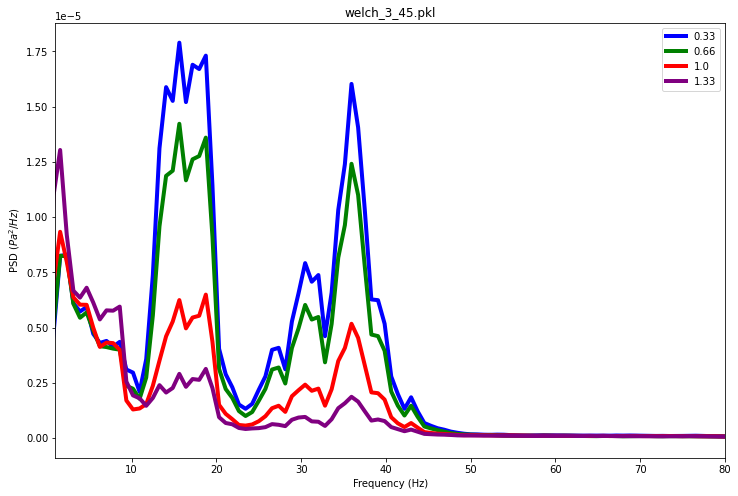

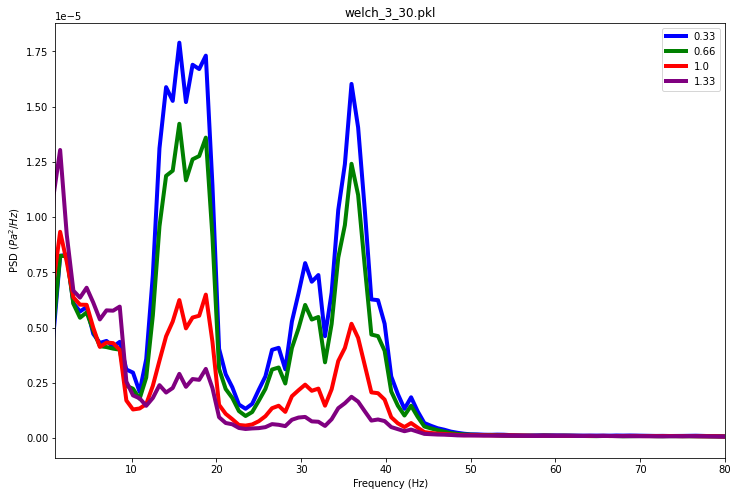

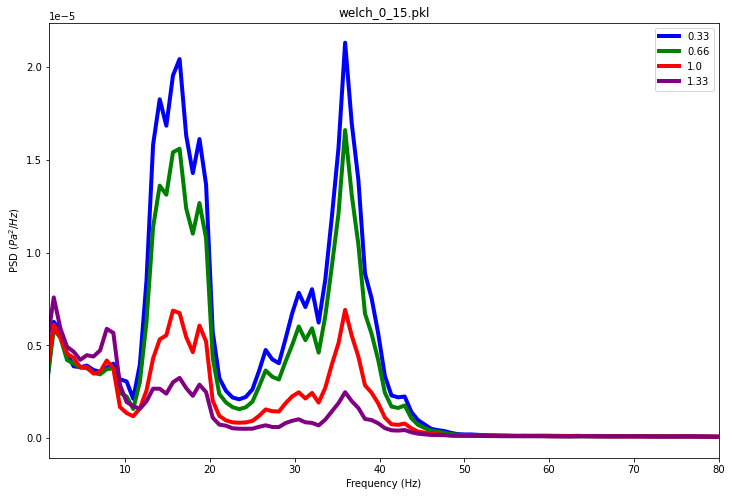

In [4]:
for window, avg_Pxx in wind_res.items():
    f, ax = plt.subplots(figsize = (12,8))
    (avg_Pxx)[[0.33,0.66,1,1.33]].plot(linewidth = 4, ax = ax, color= ['blue','green','red','purple'])
    plt.xlim(1, 80)
    plt.title('Average Power Spectral Density')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD ($Pa^{2}/Hz$)')
    plt.title(window)
    #plt.yticks([])